In [83]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [84]:
test_list = os.listdir()
test_list = [name for name in test_list if (('.py' not in name) and ('.ipynb' not in name) and ('.json' not in name) and ('small' not in name) and ('tiny' not in name))]
test_list.remove('CUBES')
test_list.remove('.git')
test_list.remove('.gitignore')
i = 0
test_list = sorted(test_list)
for name in test_list:
    text = str(i)+' '+ name
    print(text)
    i += 1

0 mati-sim 2-layers
1 mati-sim 3-layers
2 mati-sim my_params 10k g 0, 0.5, 0.9, 1
3 mati-sim my_params 10k-100mln
4 mati-sim org_params 10k-10mln
5 mati-sim veins
6 mc456 my-params light-sources
7 mc456 my_params 10k-100mln
8 mc456 org_params 10k-100mln
9 mc456 rozne g (0.0-1.0 z krokiem 0.1) 100mln
10 mc456 rozne_skóry_z_tabeli (8 rodzajów) 100mln
11 mc456_p my-params 10k-10mln


In [85]:
time_collector = []
for i in range(len(test_list)):
    time_collector.append([test_list[i]])

    if i <= 5:
        times = []
        run_name = []
        file_small_dump = 'small_sim_dump.json'
        file_full_dump = 'sim_dump.json'
        sub_test_series = os.listdir(test_list[i])
        sub_test_series = [name for name in sub_test_series if '.png' not in name]
        sub_test_series = [name for name in sub_test_series if '.jpg' not in name]
        sub_test_series = [name for name in sub_test_series if '.jpeg' not in name]
        for j in range(len(sub_test_series)):
            results_path = os.path.join(test_list[i], sub_test_series[j], 'resultRecords')
            result_files = os.listdir(results_path)
            if file_small_dump in result_files:
                dumpi_name = file_small_dump
            else:
                dumpi_name = file_full_dump
            dumpi_name = os.path.join(results_path, dumpi_name)
            with open(dumpi_name, 'r') as f:
                sim_dump = json.load(f)
            t = sim_dump['simulation_calculation_time']
            t = float(t)
            times.append(t)
            run_name.append(sub_test_series[j])
        time_collector[i].append(times)
        time_collector[i].append(run_name)

    if i > 5:
        times = []
        run_name = []
        sub_test_series = os.listdir(test_list[i])
        sub_test_series = [name for name in sub_test_series if '.json' not in name]
        for j in range(len(sub_test_series)):
            path_log = os.path.join(test_list[i], sub_test_series[j])
            with open(path_log, 'r') as f:
                sim_log = f.readline()
            sim_log = sim_log.split(' ')[2]
            # time elapsed: 1073.3080 seconds
            t = float(sim_log)
            times.append(t)
            run_name.append(sub_test_series[j])
        time_collector[i].append(times)
        time_collector[i].append(run_name)

print(time_collector)

[['mati-sim 2-layers', [9.886546611785889, 988.9582951068878, 0.9880919456481934, 98.03512787818909, 9912.306844949722], ['1000_photons', '100_000_photons', '100_photons', '10_000_photons', '1_000_000_photons']], ['mati-sim 3-layers', [128.9927453994751, 1021.687760591507, 13.117117881774902, 102.9924259185791, 10031.441426038742], ['1000_fotonow', '100_000_fotonow', '100_fotonow', '10_000_fotonow', '1_000_000']], ['mati-sim my_params 10k g 0, 0.5, 0.9, 1', [508.72013306617737, 453.6809570789337, 176.38519525527954, 61.41500186920166], ['mati-sim_g_0', 'mati-sim_g_0_5', 'mati-sim_g_0_9', 'mati-sim_g_1']], ['mati-sim my_params 10k-100mln', [174.1371350288391, 196204.2739892006, 0.2132875919342041, 17.567716360092163, 19611.488008260727, 1768.5320315361023], ['t_100k_my_params', 't_100mln_my_params', 't_100_my_params', 't_10k_my_params', 't_10mln_my_params', 't_1mln_my_params']], ['mati-sim org_params 10k-10mln', [1249.3648731708527, 129.426011800766, 123736.5491771698, 11969.79120612144

In [86]:
photons = [[1000, 100_000, 100, 10_000, 1_000_000], [1000, 100_000, 100, 10_000, 1_000_000], ['g0', 'g0.5', 'g0.9', 'g1'], [100_000, 100_000_000, 100, 10_000, 10_000_000, 1_000_000]]
photons += [[100_000, 10_000, 10_000_000, 1_000_000], [1000, 100_000, 100, 100, 10_000], ['coll_gauss', 'down', 'foc_gauss', 'isotropic', 'up']]
photons += [[100_000, 100_000_000, 10_000, 10_000_000, 1_000_000], [100_000, 100_000_000, 10_000, 10_000_000, 1_000_000], ['g0'], ['g0']]
photons += [[100_000, 10_000, 10_000_000, 1_000_000]]
idx_out = [isinstance(l[0], str) for l in photons]
photons = [l for l, cond in zip(photons, idx_out) if not cond]
time_collector = [l for l, cond in zip(time_collector, idx_out) if not cond]

for i in range(len(time_collector)):
    if len(time_collector[i]) < 4:
        time_collector[i].append(photons[i])

csv_list = ['seria_testow','test','photon_num','seconds']
csv_text = ','.join(csv_list) + '\n'
for test in time_collector:
    print('=============================')
    print(test[0])
    print('przebiegi')
    print(f'{'test' : >90}{'photon_num' : >20}{'seconds' : >20}')
    for y, x_str, x in zip(test[1], test[2], test[3]):
        print(f'{x_str : >90}{x : >20,}{y : >20,.3}')
        csv_list = [test[0],x_str,x,y]
        csv_list = [str(e) for e in csv_list]
        csv_text += ','.join(csv_list) + '\n'

with open('time_csv.csv', 'w') as f:
    f.write(csv_text)

mati-sim 2-layers
przebiegi
                                                                                      test          photon_num             seconds
                                                                              1000_photons               1,000                9.89
                                                                           100_000_photons             100,000            9.89e+02
                                                                               100_photons                 100               0.988
                                                                            10_000_photons              10,000                98.0
                                                                         1_000_000_photons           1,000,000            9.91e+03
mati-sim 3-layers
przebiegi
                                                                                      test          photon_num             seconds
                           

In [87]:
xy_list = []
for i in range(len(time_collector)):
    print(i)
    arr = np.array(time_collector[i][3])
    print(arr.shape)
    idx_sorted = np.argsort(arr)
    photon_num = arr[idx_sorted]
    time_arr = np.array(time_collector[i][1])
    print(time_arr.shape)
    time_arr = time_arr[idx_sorted]
    xy_list.append([photon_num, time_arr])

0
(5,)
(5,)
1
(5,)
(5,)
2
(6,)
(6,)
3
(4,)
(4,)
4
(5,)
(5,)
5
(5,)
(5,)
6
(5,)
(5,)
7
(4,)
(4,)


In [88]:
names = [time_collector[i][0] for i in range(len(xy_list))]
for i in range(len(xy_list)):
    print(str(i)+' '+names[i])

0 mati-sim 2-layers
1 mati-sim 3-layers
2 mati-sim my_params 10k-100mln
3 mati-sim org_params 10k-10mln
4 mati-sim veins
5 mc456 my_params 10k-100mln
6 mc456 org_params 10k-100mln
7 mc456_p my-params 10k-10mln


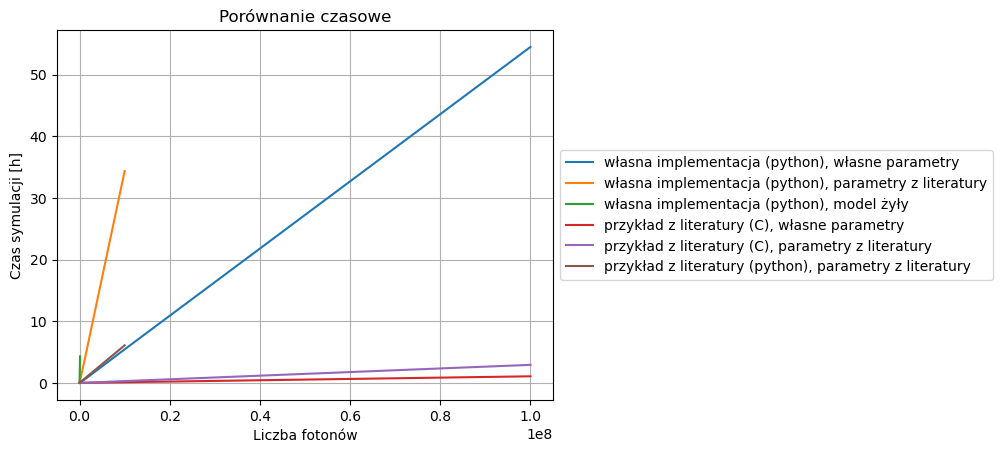

In [89]:
names = [time_collector[i][0] for i in range(len(xy_list))]
skip = [0,1,4]
skip = [0,1]
names2 = [n for n,i in zip(names, range(len(names))) if i not in skip]

for i in range(len(xy_list)):

    if i in skip:
        continue

    [photon_num, time_arr] = xy_list[i]
    x = photon_num
    y = time_arr / 60 / 60
    plt.plot(x, y)
    # plt.scatter(x, y, marker='x')

names3 = ['własna implementacja (python), własne parametry',
          'własna implementacja (python), parametry z literatury',
          'własna implementacja (python), model żyły',
          'przykład z literatury (C), własne parametry',
          'przykład z literatury (C), parametry z literatury',
          'przykład z literatury (python), parametry z literatury']
plt.legend(names3, loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlim((0,10**3))
# plt.xscale('log')
plt.grid()
plt.title('Porównanie czasowe')
plt.xlabel('Liczba fotonów')
plt.ylabel('Czas symulacji [h]')
plt.show()

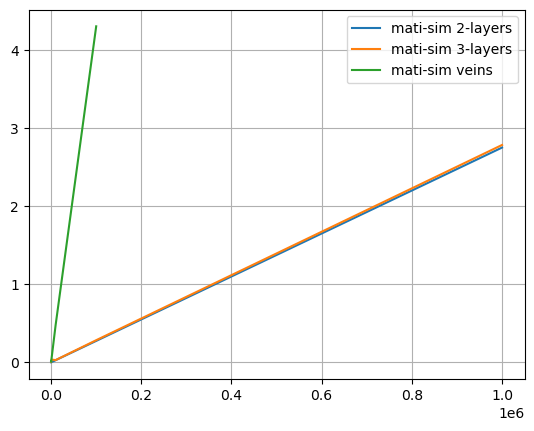

In [90]:
names = [time_collector[i][0] for i in range(len(xy_list))]
skip = [0,1,4]
names2 = [n for n,i in zip(names, range(len(names))) if i in skip]

for i in range(len(xy_list)):

    if i not in skip:
        continue

    [photon_num, time_arr] = xy_list[i]
    x = photon_num
    y = time_arr / 60 / 60
    plt.plot(x, y)
    # plt.scatter(x, y, marker='x')

plt.legend(names2)
# plt.xlim((0,10**3))
# plt.xscale('log')
plt.grid()
plt.show()